In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('Churn Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(columns=["RowNumber","CustomerId","Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**No Null-value in this dataset**

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


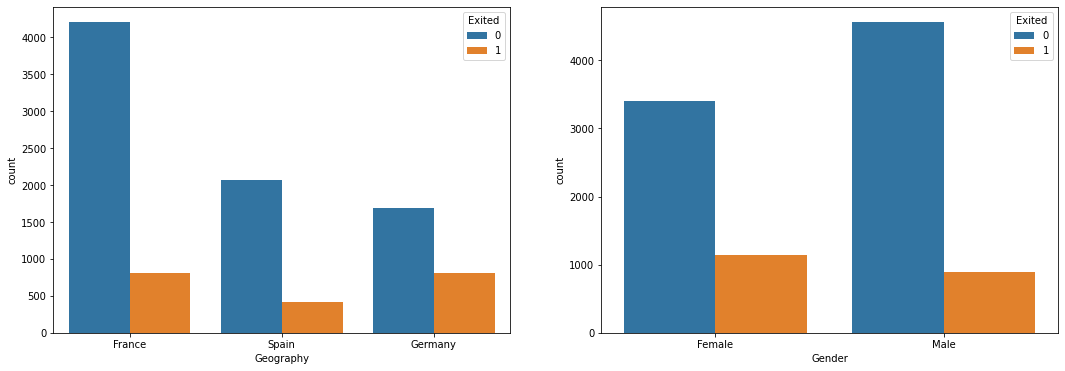

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(data = df,
              x = 'Geography',
              hue = 'Exited',
              ax=ax[0])
sns.countplot(data = df,
              x='Gender',
              hue = 'Exited',
              ax=ax[1])


*   **Majority of the data is from people from France.**
*   **The proportion of female customers churning is greater than that of male customers**





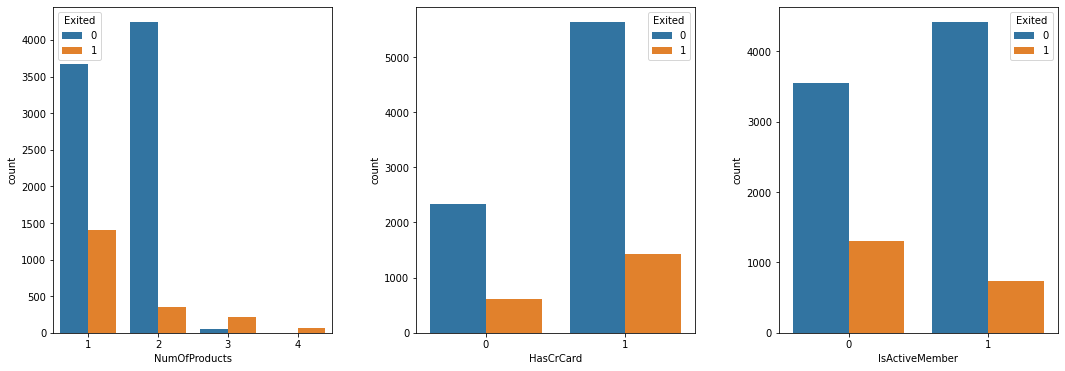

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(data=df,
              x='NumOfProducts',
              hue='Exited',
              ax=ax[0])
sns.countplot(data=df,
              x='HasCrCard',
              hue='Exited',
              ax=ax[1])
sns.countplot(data=df,
              x='IsActiveMember',
              hue='Exited',
              ax=ax[2])


**We can see that customers with 3-4 products and inactive member have higher chances to churn.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; y

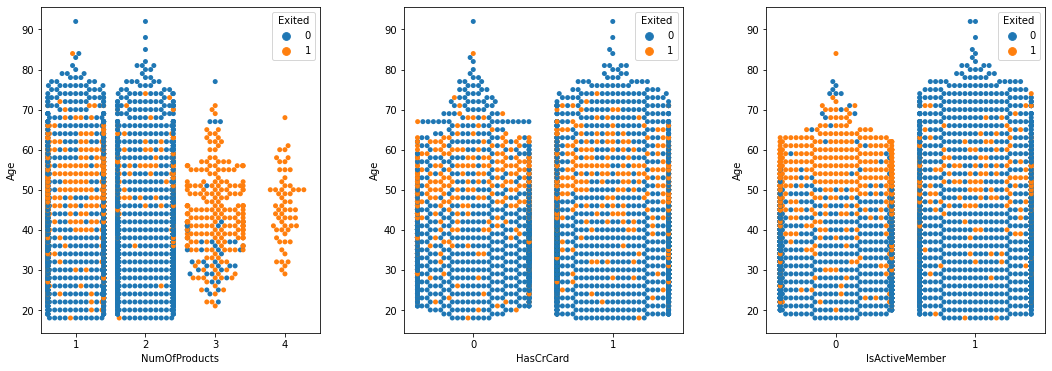

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(data = df,
              x = "NumOfProducts",
              y = "Age", hue="Exited",
              ax= ax[0])
sns.swarmplot(data = df,
              x = "HasCrCard",
              y = "Age",
              hue="Exited",
              ax = ax[1])
sns.swarmplot(data = df,
              x = "IsActiveMember",
              y = "Age",
              hue="Exited",
              ax = ax[2])

**As can be seen from above swarmplots:**

*   Customers with 3 or more products have high chances of churn.
*   No relation can be seen with churn of customer having credit card or not.
*   Inactive older age customers have very high chances of churn.







In [10]:

count_age = df.Age.value_counts()
age_bar = px.bar(x = count_age.index,
                 y = count_age.values,
                 title = 'Count of Ages')
age_bar.update_layout(xaxis_title = 'Count',
                    yaxis_title = 'Age')
age_bar.show()


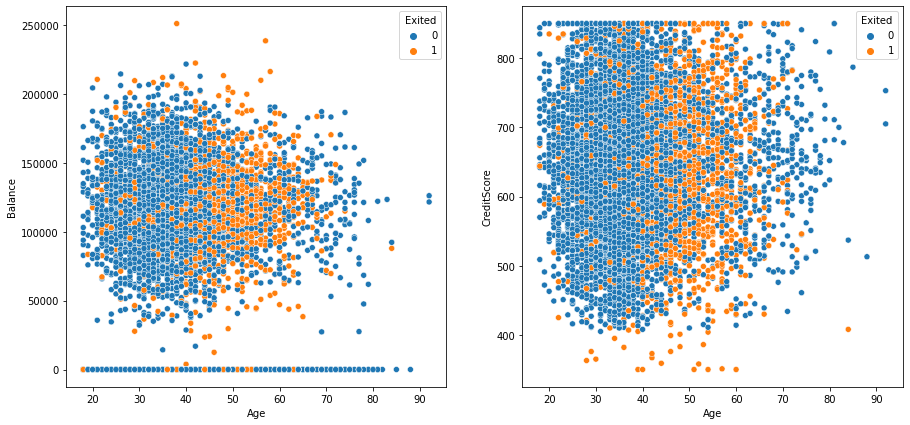

In [11]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(data = df,
                x = "Age",
                y = "Balance",
                hue = "Exited",
                sizes = (10, 200),
                ax=ax[0])
sns.scatterplot(x = "Age",
                data = df,
                y = "CreditScore",
                hue = "Exited",
                sizes = (10, 200),
                ax=ax[1])

*   **40 to 70 years old customers are higher chances to churn**
*   **Customer with CreditScore less then 400 are higher chances to churn**




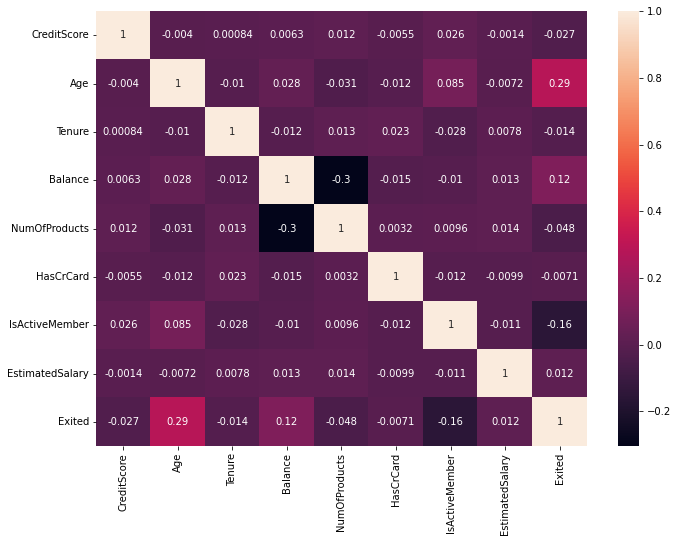

In [12]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Build Model**

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [15]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Label Encoding the 'Gender' column:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#One Hot Encoding the 'Geography' column:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])],
                       remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [20]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [21]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [22]:
model_history = ann.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 50)


Epoch 1/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5702 - accuracy: 0.7231 - val_loss: 0.4778 - val_accuracy: 0.7993
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.8022 - val_loss: 0.4438 - val_accuracy: 0.8035
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8117 - val_loss: 0.4268 - val_accuracy: 0.8088
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4111 - accuracy: 0.8145 - val_loss: 0.4134 - val_accuracy: 0.8148
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8272 - val_loss: 0.4001 - val_accuracy: 0.8213
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8442 - val_loss: 0.3878 - val_accuracy: 0.8326
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8522 - val_loss: 0.3769 - val_accuracy: 0.8364
Epoch 

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

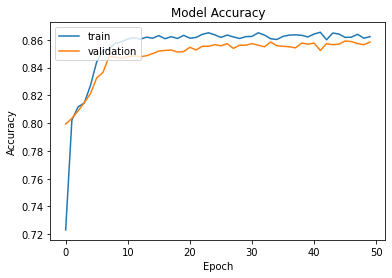

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



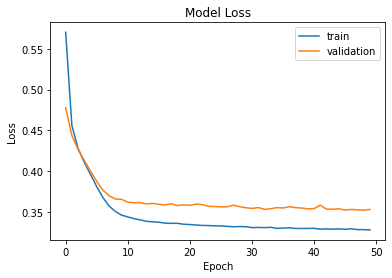

In [25]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1520   75]
 [ 200  205]]


In [28]:
print(accuracy_score(y_test, y_pred))

0.8625
